Date: 03/01/2024 <br>
Desc: To get the expected mean of the moving average of measured throughput for waypoint mode in the reliable region.

In [1]:
import pandas as pd
import numpy as np
import glob, os
from tqdm import tqdm

# Set dataset path
sim_root_path = '''/media/research-student/One Touch/FANET Datasets/DJISpark_Measured_Throughput_10000Samples/data_waypoint_processed_dl-5secWinSize1secStride_ul-1secWinSize100msecStride'''
scenario_list = [f.path for f in os.scandir(sim_root_path) if f.is_dir()] # Get list of "unique" scenarios

window_size = 3
reliability_th = 0.99
ul_moving_avg_throughput = np.array([])
dl_moving_avg_throughput = np.array([])

for scenario in tqdm(scenario_list):
    # Compile data from each scenario
    throughput_files = glob.glob("{}/*.csv".format(scenario)) # Get the different runs for each scenario
    gcs_throughput_file = [file for file in throughput_files if ('Uplink_Throughput' in file)] # Get Uplink_Throughput.csv
    uavs_throughput_files = [file for file in throughput_files if ('Uplink_Throughput' not in file)] # Get everything else
    gcs_throughput_df = pd.read_csv(gcs_throughput_file[0])
    uavs_throughput_df_list = []
    for uav_throughput_file in uavs_throughput_files:
        uavs_throughput_df_list.append(pd.read_csv(uav_throughput_file))
    uavs_throughput_df = pd.concat(uavs_throughput_df_list)
    # Get moving average of DL
    # NOTE: Assumes the throughput DFs are grouped based on different runs and sorted by "Time"
    # The run index is to separate the DF into different runs (which are from several UAVs).
    run_index = (uavs_throughput_df["Time"].gt(uavs_throughput_df["Time"].shift(-1))).values
    run_index = np.append(np.append(-1, np.where(run_index)[0]), len(uavs_throughput_df)-1)
    for i in range(len(run_index)-1):
        run_df = uavs_throughput_df.iloc[run_index[i]+1:run_index[i+1]+1]
        run_df = run_df.loc[run_df["Measured_Reliability"]>=reliability_th]
        windows_throughput = run_df["Throughput"].rolling(window_size)
        run_th_moving_avg = windows_throughput.mean().to_numpy()
        dl_moving_avg_throughput = np.append(dl_moving_avg_throughput, run_th_moving_avg)
    # Get moving average of UL
    # The run index is to separate the DF into different runs (which are from several UAVs).
    run_index = (gcs_throughput_df["Time"].gt(gcs_throughput_df["Time"].shift(-1))).values
    run_index = np.append(np.append(-1, np.where(run_index)[0]), len(gcs_throughput_df)-1)
    for i in range(len(run_index)-1):
        run_df = gcs_throughput_df.iloc[run_index[i]+1:run_index[i+1]+1]
        run_df = run_df.loc[run_df["Measured_Reliability"]>=reliability_th]
        windows_throughput = run_df["Throughput"].rolling(window_size)
        run_th_moving_avg = windows_throughput.mean().to_numpy()
        ul_moving_avg_throughput = np.append(ul_moving_avg_throughput, run_th_moving_avg)

dl_mv_throughput_mean = np.nanmean(dl_moving_avg_throughput)
ul_mv_throughput_mean = np.nanmean(ul_moving_avg_throughput)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 17.51it/s]


In [2]:
dl_mv_throughput_mean

28.824867420612104

In [3]:
ul_mv_throughput_mean

4694.029472936641

## Plot throughput at reliable region

100%|██████████| 1/1 [00:00<00:00, 14.05it/s]


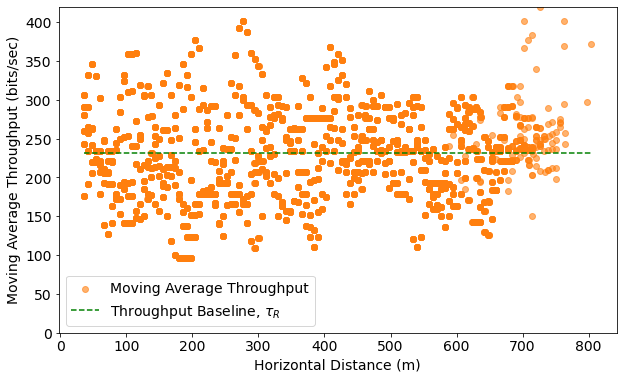

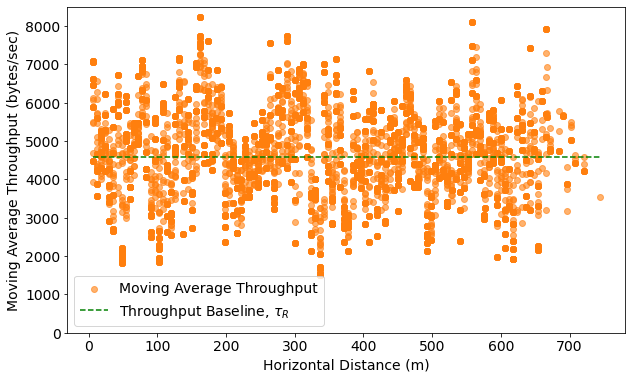

In [12]:
import pandas as pd
import numpy as np
import glob, os
import matplotlib.pyplot as plt

# Set dataset path
sim_root_path = "/media/research-student/One Touch/FANET Datasets/DJISpark_Measured_Throughput_10000Samples/temp_plot"
scenario_list = [f.path for f in os.scandir(sim_root_path) if f.is_dir()] # Get list of "unique" scenarios

window_size = 3
reliability_th = 0.99
ul_moving_avg_throughput = np.array([])
ul_moving_avg_hdist = np.array([])
dl_moving_avg_throughput = np.array([])
dl_moving_avg_hdist = np.array([])

for scenario in tqdm(scenario_list):
    # Compile data from each scenario
    throughput_files = glob.glob("{}/*.csv".format(scenario)) # Get the different runs for each scenario
    gcs_throughput_file = [file for file in throughput_files if ('Uplink_Throughput' in file)] # Get Uplink_Throughput.csv
    uavs_throughput_files = [file for file in throughput_files if ('Uplink_Throughput' not in file)] # Get everything else
    gcs_throughput_df = pd.read_csv(gcs_throughput_file[0])
    uavs_throughput_df_list = []
    for uav_throughput_file in uavs_throughput_files:
        uavs_throughput_df_list.append(pd.read_csv(uav_throughput_file))
    uavs_throughput_df = pd.concat(uavs_throughput_df_list)
    # Get moving average of DL
    # NOTE: Assumes the throughput DFs are grouped based on different runs and sorted by "Time"
    # The run index is to separate the DF into different runs (which are from several UAVs).
    run_index = (uavs_throughput_df["Time"].gt(uavs_throughput_df["Time"].shift(-1))).values
    run_index = np.append(np.append(-1, np.where(run_index)[0]), len(uavs_throughput_df)-1)
    for i in range(len(run_index)-1):
        run_df = uavs_throughput_df.iloc[run_index[i]+1:run_index[i+1]+1]
        run_df = run_df.loc[run_df["Measured_Reliability"]>=reliability_th]
        windows_throughput = run_df["Throughput"].rolling(window_size)
        run_th_moving_avg = windows_throughput.mean().to_numpy()
        windows_hdist = run_df["Horizontal_Distance"].rolling(window_size)
        run_hdist_moving_avg = windows_hdist.max().to_numpy()
        dl_moving_avg_throughput = np.append(dl_moving_avg_throughput, run_th_moving_avg)
        dl_moving_avg_hdist = np.append(dl_moving_avg_hdist, run_hdist_moving_avg)
    # Get moving average of UL
    # The run index is to separate the DF into different runs (which are from several UAVs).
    run_index = (gcs_throughput_df["Time"].gt(gcs_throughput_df["Time"].shift(-1))).values
    run_index = np.append(np.append(-1, np.where(run_index)[0]), len(gcs_throughput_df)-1)
    for i in range(len(run_index)-1):
        run_df = gcs_throughput_df.iloc[run_index[i]+1:run_index[i+1]+1]
        run_df = run_df.loc[run_df["Measured_Reliability"]>=reliability_th]
        windows_throughput = run_df["Throughput"].rolling(window_size)
        run_th_moving_avg = windows_throughput.mean().to_numpy()
        windows_hdist = run_df["Horizontal_Distance"].rolling(window_size)
        run_hdist_moving_avg = windows_hdist.max().to_numpy()
        ul_moving_avg_throughput = np.append(ul_moving_avg_throughput, run_th_moving_avg)
        ul_moving_avg_hdist = np.append(ul_moving_avg_hdist, run_hdist_moving_avg)

# Plot "Uplink" (DL) Moving Average Throughput
movingAvgThroughput = 28.94 * 8 # In bits/sec
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.scatter(dl_moving_avg_hdist, dl_moving_avg_throughput*8, c="tab:orange", alpha=0.6)
plt.plot([np.nanmin(dl_moving_avg_hdist), np.nanmax(dl_moving_avg_hdist)], [movingAvgThroughput, movingAvgThroughput], '--g')
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Moving Average Throughput (bits/sec)")
plt.ylim(0,420)
plt.legend(["Moving Average Throughput", "Throughput Baseline, $τ_{R}$"])

# Plot "Downlink" (UL) Moving Average Throughput
movingAvgThroughput = 4593.15 # In bytes/sec
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.scatter(ul_moving_avg_hdist, ul_moving_avg_throughput, c="tab:orange", alpha=0.6)
plt.plot([np.nanmin(ul_moving_avg_hdist), np.nanmax(ul_moving_avg_hdist)], [movingAvgThroughput, movingAvgThroughput], '--g')
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Moving Average Throughput (bytes/sec)")
plt.ylim(0,8500)
plt.legend(["Moving Average Throughput", "Throughput Baseline, $τ_{R}$"])